In [1]:
!pip install Image opencv-python

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1791
1124


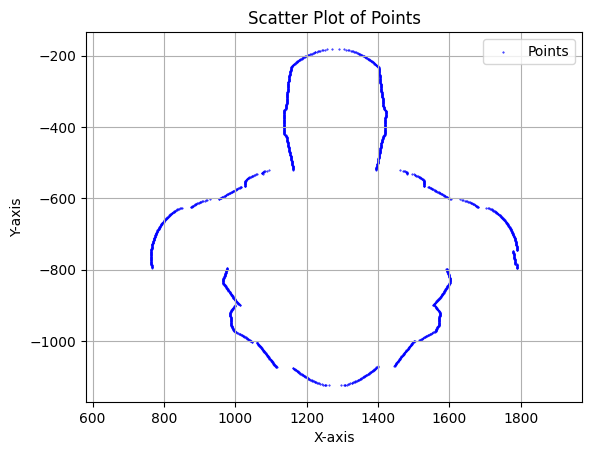

Num Points: 3784


In [2]:
import cv2 # Same thing in c++ but i can't use cause i got no space............. BALLS
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
img_name = 'test17.png'
img_path = '/content/drive/My Drive/Colab Notebooks/'+img_name
image = cv2.imread(img_path)

image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(image_bw,(5,5),0)


ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


kernel = np.ones((5,5),np.uint8)

dilation = cv2.dilate(th3,kernel,iterations = 1)

def image_to_array():
    arr = np.array(dilation)  # Convert to NumPy array
    return arr

def extract_boundary():
    # Convert image to grayscale array
    img_array = image_to_array()

    # Thresholding to create a binary image (0 = background, 255 = object)
    _, binary = cv2.threshold(img_array, 128, 255, cv2.THRESH_BINARY)

    # Detect edges using Canny
    edges = cv2.Canny(binary, 100, 200)

    # Get the (x, y) coordinates of edge pixels
    boundary_points = np.column_stack(np.where(edges > 0))

    return boundary_points

boundary = extract_boundary()

boundary[:,0] = -1*boundary[:,0]
minY = 0
maxY = 0
minX = 0
maxX = 0
for point in boundary:
  if(point[0] < maxY):
    maxY = point[0]
  if(point[0] > minY):
    minY = point[0]
  if(point[1] < minX):
    minX = point[1]
  if(point[1] > maxX):
    maxX = point[1]
maxY = -maxY
print(maxX)
print(maxY)
grid = np.zeros((maxY, maxX))
grid2 = np.zeros((maxY, maxX))

for point in boundary:
  y, x = point
    # Ensure that the indices are within bounds of the grid
  if 0 <= x < maxX and 0 <= -y < maxY:
    grid[-y, x] = 1  # You can set a value (e.g., 1) at the point's (x, y) position

for i in range(1,maxY-1):
  g = grid[i]
  found = False
  ind = -1
  for j in range(maxX):
    if (g[j] == 1):
      ind = j
      if not found:
        grid2[i][j] = 1
        found = True
  try:
    if found:
      grid2[i][ind] = 1
  except:
    pass
grid2[0] = grid[0]
grid2[maxY-1] = grid[maxY-1]

boundary = np.argwhere(grid2 == 1)
boundary[:,0] = -1*boundary[:,0]
output = ''
for point in boundary:
  hashy = True
  for co in point:
    if hashy:
      output += (co.__str__()+"#")
      hashy = False
    else:
      output += (co.__str__()) # List of (y, x) coordinates of the hitbox perimeter
  output += '\n'
with open('/content/drive/My Drive/Colab Notebooks/'+img_name+'Points.txt','w') as file:
  file.write(output)
x = boundary[:,1]
y = boundary[:, 0]

plt.scatter(x, y, color='blue', marker='o', label="Points", s=0.2)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot of Points")
plt.axis('equal')
plt.legend()
plt.grid()
plt.show()

print("Num Points: "+boundary.size.__str__())


#Those are points not a real graph, store vals in txt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# --- Key generation ---
def generate_keys():
    a = np.random.uniform(1, 10)
    b = np.random.uniform(1, 10)
    c = np.random.uniform(1, 10)
    return a, b, c

# --- Transcendental encryption function ---
def f(m, a, b, c):
    return np.sin(a * m) + np.log(b * m + 1) + np.arctan(c * m**2)

# --- Encryption ---
def encrypt(m, a, b, c):
    R = np.random.uniform(-5, 5)  # Noise (public)
    E = f(m, a, b, c) + R
    return E, R

# --- Decryption (solves for m numerically) ---
def decrypt(E, R, a, b, c):
    target = E - R

    def equation(m):
        return f(m, a, b, c) - target

    sol = root_scalar(equation, bracket=[0.0001, 10], method='brentq')
    return sol.root if sol.converged else None

# --- Simulated quantum brute-force attacker ---
def quantum_sim_crack(E, R, precision=0.001):
    # Attempt to guess m by evaluating f(m) across a dense range
    guesses = np.arange(0.001, 10, precision)
    target = E - R
    for m in guesses:
        val = np.sin(3.618 * m) + np.log(7.123 * m + 1) + np.arctan(1.414 * m**2)
        if np.isclose(val, target, atol=0.01):
            return m
    return None

# Test values
m = 4.5
a, b, c = 3.618, 7.123, 1.414  # fixed key for demo
s = 23
E, R = encrypt(m, s)
decrypted_m, decrypted_s = decrypt(E, R, a, b, c) #-> true_m and signature
cracked_m = quantum_sim_crack(E, R)
print(E, R, decrypted_m, cracked_m)


1.426410004759643 -3.065417659777977 5.012974977845535 1.867
